In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

height_file = open('240_ipm_heights.pickle', 'rb')
height_data = pickle.loads(height_file.read())
velocities = [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5., 4.0]

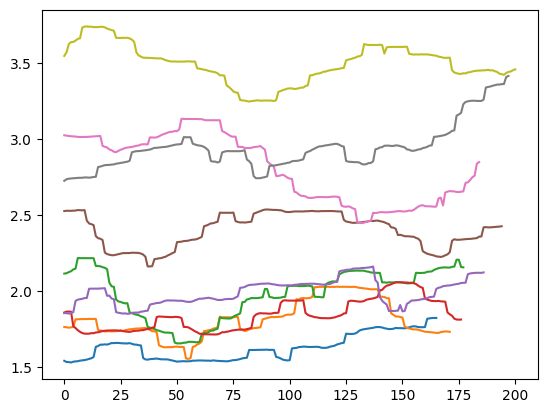

In [7]:
#trim data

upper_trim_idx = 70
lower_trim_idx = 50
heights = []
for height in height_data:
    heights.append(height[lower_trim_idx:-upper_trim_idx,1])
for height in heights:
        plt.plot(height)
plt.show()

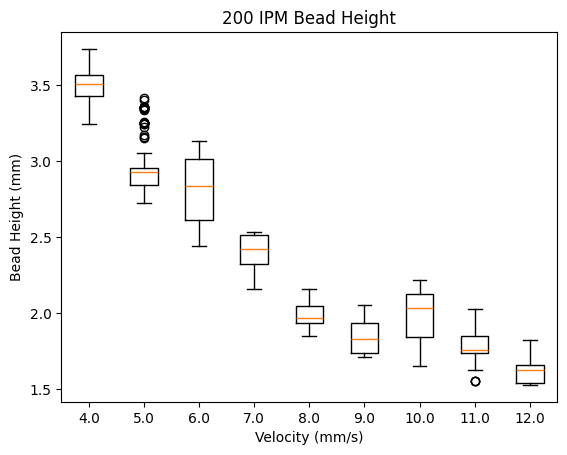

In [8]:
fig, ax = plt.subplots(1,1)
ax.boxplot(heights, positions=velocities, widths=0.5)
plt.title("200 IPM Bead Height")
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Bead Height (mm)")
plt.show()